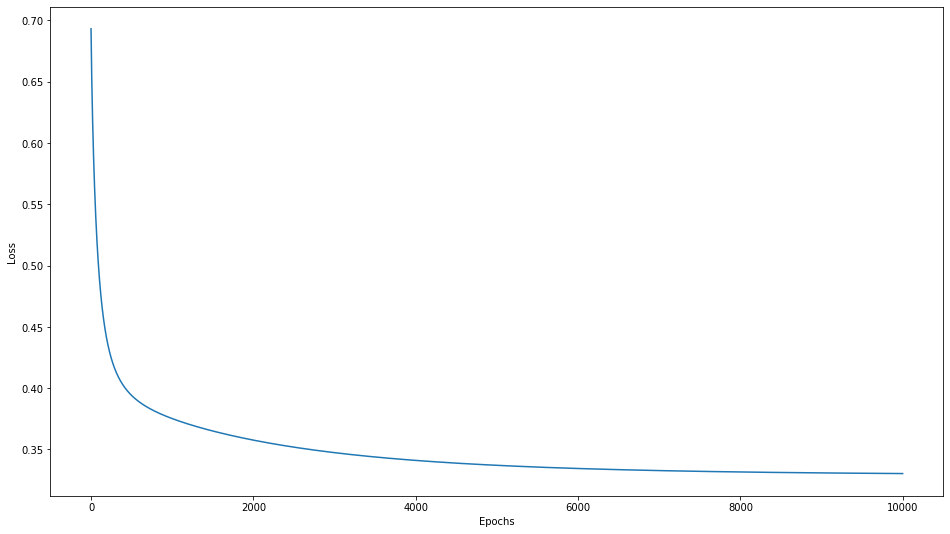

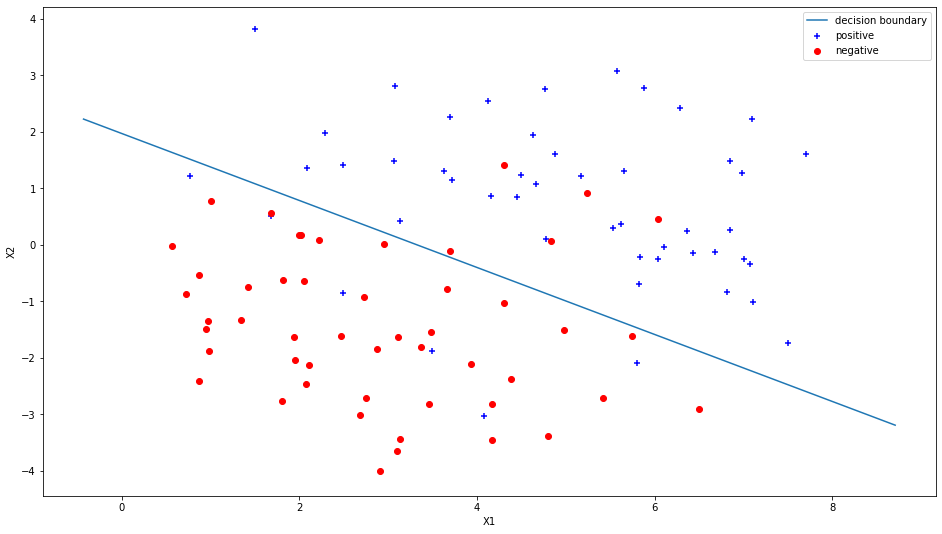

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.loadtxt('logistic_x.txt')
y = np.loadtxt('logistic_y.txt').astype('int32')
y[y == -1] = 0

x_min = np.min(x[:, 0]) - 1
x_max = np.max(x[:, 0]) + 1
x_range = np.linspace(x_min, x_max, 20)

xx = np.c_[np.ones(len(x)), x]
yy = np.reshape(y, (-1, 1))

pos_dataset = x[y == 1]
neg_dataset = x[y != 1]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

num_iterate = 10000
alpha = 0.01
theta = np.zeros((3, 1))
epsilon = 1e-6
costs = []

for i in range(num_iterate):
    z = xx @ theta
    y_hat = sigmoid(z)
    error = y_hat - yy
    cost = -(yy.T @ np.log(y_hat + epsilon) + (1 - yy.T) @ np.log(1 - y_hat + epsilon)) / len(xx)
    costs.append(cost.flatten())
    theta = theta - alpha * (xx.T @ error) / len(xx)
    

theta = theta.flatten()
y_hat = -(theta[0] + theta[1] * x_range) / theta[2]  


plt.figure(figsize=(16, 9))
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(figsize=(16, 9))
plt.scatter(pos_dataset[:, 0], pos_dataset[:, 1], marker='+', color='blue', label='positive')
plt.scatter(neg_dataset[:, 0], neg_dataset[:, 1], marker='o', color='red', label='negative')
plt.plot(x_range, y_hat, label='decision boundary')
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend()